Force the backend to be present time graphical before imported code sets backend to agg.

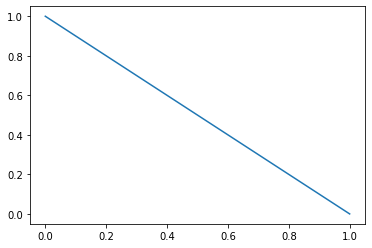

In [1]:
import matplotlib.pyplot as plt
plt.plot([0,1],[1,0])
plt.show()

In [ ]:
# coding: utf-8
import unittest

import matplotlib as mpl
mpl.use('Agg')

import matplotlib.pyplot as plt


from neuronunit.optimisation.optimization_management import inject_and_plot_model, dtc_to_rheo
from neuronunit.optimisation.optimization_management import inject_and_plot_passive_model

import numpy as np
from neuronunit.optimisation.data_transport_container import DataTC
from neuronunit.optimisation import model_parameters
from elephant.spike_train_generation import threshold_detection
import quantities as pq


class testCrucialBackendsSucceed(unittest.TestCase):
    def setUp(self):
        model_parameters.MODEL_PARAMS.keys()
        self.backends =  ["RAW", "HH"]
        self.other_backends =["BHH","ADEXP"]
        self.backends_complex =  ["GLIF", "NEURON"]
        self.julia_backend ="JHH"

        #raw_attrs = {k:np.mean(v) for k,v in model_parameters.MODEL_PARAMS[backend].items()}
        #self.backends = backends
        self.model_parameters = model_parameters
    def test_must_pass_0(self):
        fig, axs = plt.subplots(len(self.backends)*2+1,figsize=(40, 40))
        cnt=0
        for b in self.backends:
            attrs = {k:np.mean(v) for k,v in self.model_parameters.MODEL_PARAMS[b].items()}
            pre_model = DataTC()
            if str("V_REST") in attrs.keys():
                attrs["V_REST"] = -75.0
            pre_model.attrs = attrs
            pre_model.backend = b
            vm,_ = inject_and_plot_model(pre_model.attrs,b)
            axs[cnt].plot(vm.times,vm.magnitude)
            axs[cnt].set_title(b)
            cnt+=1
            thresh = threshold_detection(vm,0.0*pq.mV)

            if len(thresh)>0 and vm is not None:
                boolean = True
            else:
                boolean = False
            self.assertTrue(boolean)
            vm,_ = inject_and_plot_passive_model(pre_model.attrs,b)
            axs[cnt].plot(vm.times,vm.magnitude)
            axs[cnt].set_title(b)
            cnt+=1

            if len(vm)>0 and vm is not None:
                boolean = True
            else:
                boolean = False
            self.assertTrue(boolean)

        return True
    def test_prefer_pass_1(self):
        fig, axs = plt.subplots(len(self.backends)*2+1,figsize=(40, 40))
        cnt=0
        for b in self.other_backends:
            attrs = {k:np.mean(v) for k,v in self.model_parameters.MODEL_PARAMS[b].items()}
            pre_model = DataTC()
            if str("V_REST") in attrs.keys():
                attrs["V_REST"] = -75.0
            pre_model.attrs = attrs
            pre_model.backend = b
            vm,_ = inject_and_plot_model(pre_model.attrs,b)
            axs[cnt].plot(vm.times,vm.magnitude)
            axs[cnt].set_title(b)
            cnt+=1
            thresh = threshold_detection(vm,0.0*pq.mV)

            if len(thresh)>0 and vm is not None:
                boolean = True
            else:
                boolean = False
            self.assertTrue(boolean)
            vm,_ = inject_and_plot_passive_model(pre_model.attrs,b)
            axs[cnt].plot(vm.times,vm.magnitude)
            axs[cnt].set_title(b)
            cnt+=1
            if len(vm)>0 and vm is not None:
                boolean = True
            else:
                boolean = False
            self.assertTrue(boolean)

        return True

    def test_prefer_pass_2(self):
        fig, axs = plt.subplots(len(self.backends)*2+1,figsize=(40, 40))
        cnt=0
        for b in self.backends_complex:
            if b in str("GLIF"):
                print(self.model_parameters.MODEL_PARAMS[b])
                attrs_ = {k:v for k,v in model_parameters.MODEL_PARAMS["GLIF"].items() if type(v) is not type(dict())}

                attrs_ = {k:v for k,v in attrs_.items() if type(v) is not type(dict()) }
                attrs_ = {k:v for k,v in attrs_.items() if type(v) is not type(None) }
                attrs_ = {k:np.mean(v) for k,v in attrs_.items() if type(v[0]) is not type(str())}
                attrs = attrs_
            else:

                attrs = {k:np.mean(v) for k,v in self.model_parameters.MODEL_PARAMS[b].items()}
            pre_model = DataTC()
            if str("V_REST") in attrs.keys():
                attrs["V_REST"] = -75.0
            pre_model.attrs = attrs
            pre_model.backend = b
            vm,_ = inject_and_plot_model(pre_model.attrs,b)
            axs[cnt].plot(vm.times,vm.magnitude)
            axs[cnt].set_title(b)
            cnt+=1
            thresh = threshold_detection(vm,0.0*pq.mV)

            if len(thresh)>0 and vm is not None:
                boolean = True
            else:
                boolean = False
            self.assertTrue(boolean)
            vm,_ = inject_and_plot_passive_model(pre_model.attrs,b)
            axs[cnt].plot(vm.times,vm.magnitude)
            axs[cnt].set_title(b)
            cnt+=1

            if len(vm)>0 and vm is not None:
                boolean = True
            else:
                boolean = False
            self.assertTrue(boolean)

        return True



{'amplitude': array(0.015860795974731445) * pA, 'duration': array(1000.0) * ms, 'delay': array(100.0) * ms}
{'amplitude': array(-10.0) * pA, 'duration': array(500.0) * ms, 'delay': array(200.0) * m}


WARNING    neurongroup_2's variable 'vm' has NaN, very large values, or encountered an error in numerical integration. This is usually a sign that an unstable or invalid integration method was chosen. [brian2.groups.group.invalid_values]
WARNING    neurongroup_2's variable 'h' has NaN, very large values, or encountered an error in numerical integration. This is usually a sign that an unstable or invalid integration method was chosen. [brian2.groups.group.invalid_values]
WARNING    neurongroup_2's variable 'm' has NaN, very large values, or encountered an error in numerical integration. This is usually a sign that an unstable or invalid integration method was chosen. [brian2.groups.group.invalid_values]
WARNING    neurongroup_2's variable 'n' has NaN, very large values, or encountered an error in numerical integration. This is usually a sign that an unstable or invalid integration method was chosen. [brian2.groups.group.invalid_values]


[   1.    92.5  184.   275.5  367.   458.5  550. ]
[   1.    92.5  184.   275.5  367.   458.5  550. ]
{'amplitude': array(107.43877551020408) * pA, 'duration': array(1000.0) * ms, 'delay': array(100.0) * ms}
{'amplitude': array(-10.0) * pA, 'duration': array(500.0) * ms, 'delay': array(200.0) * m}


True

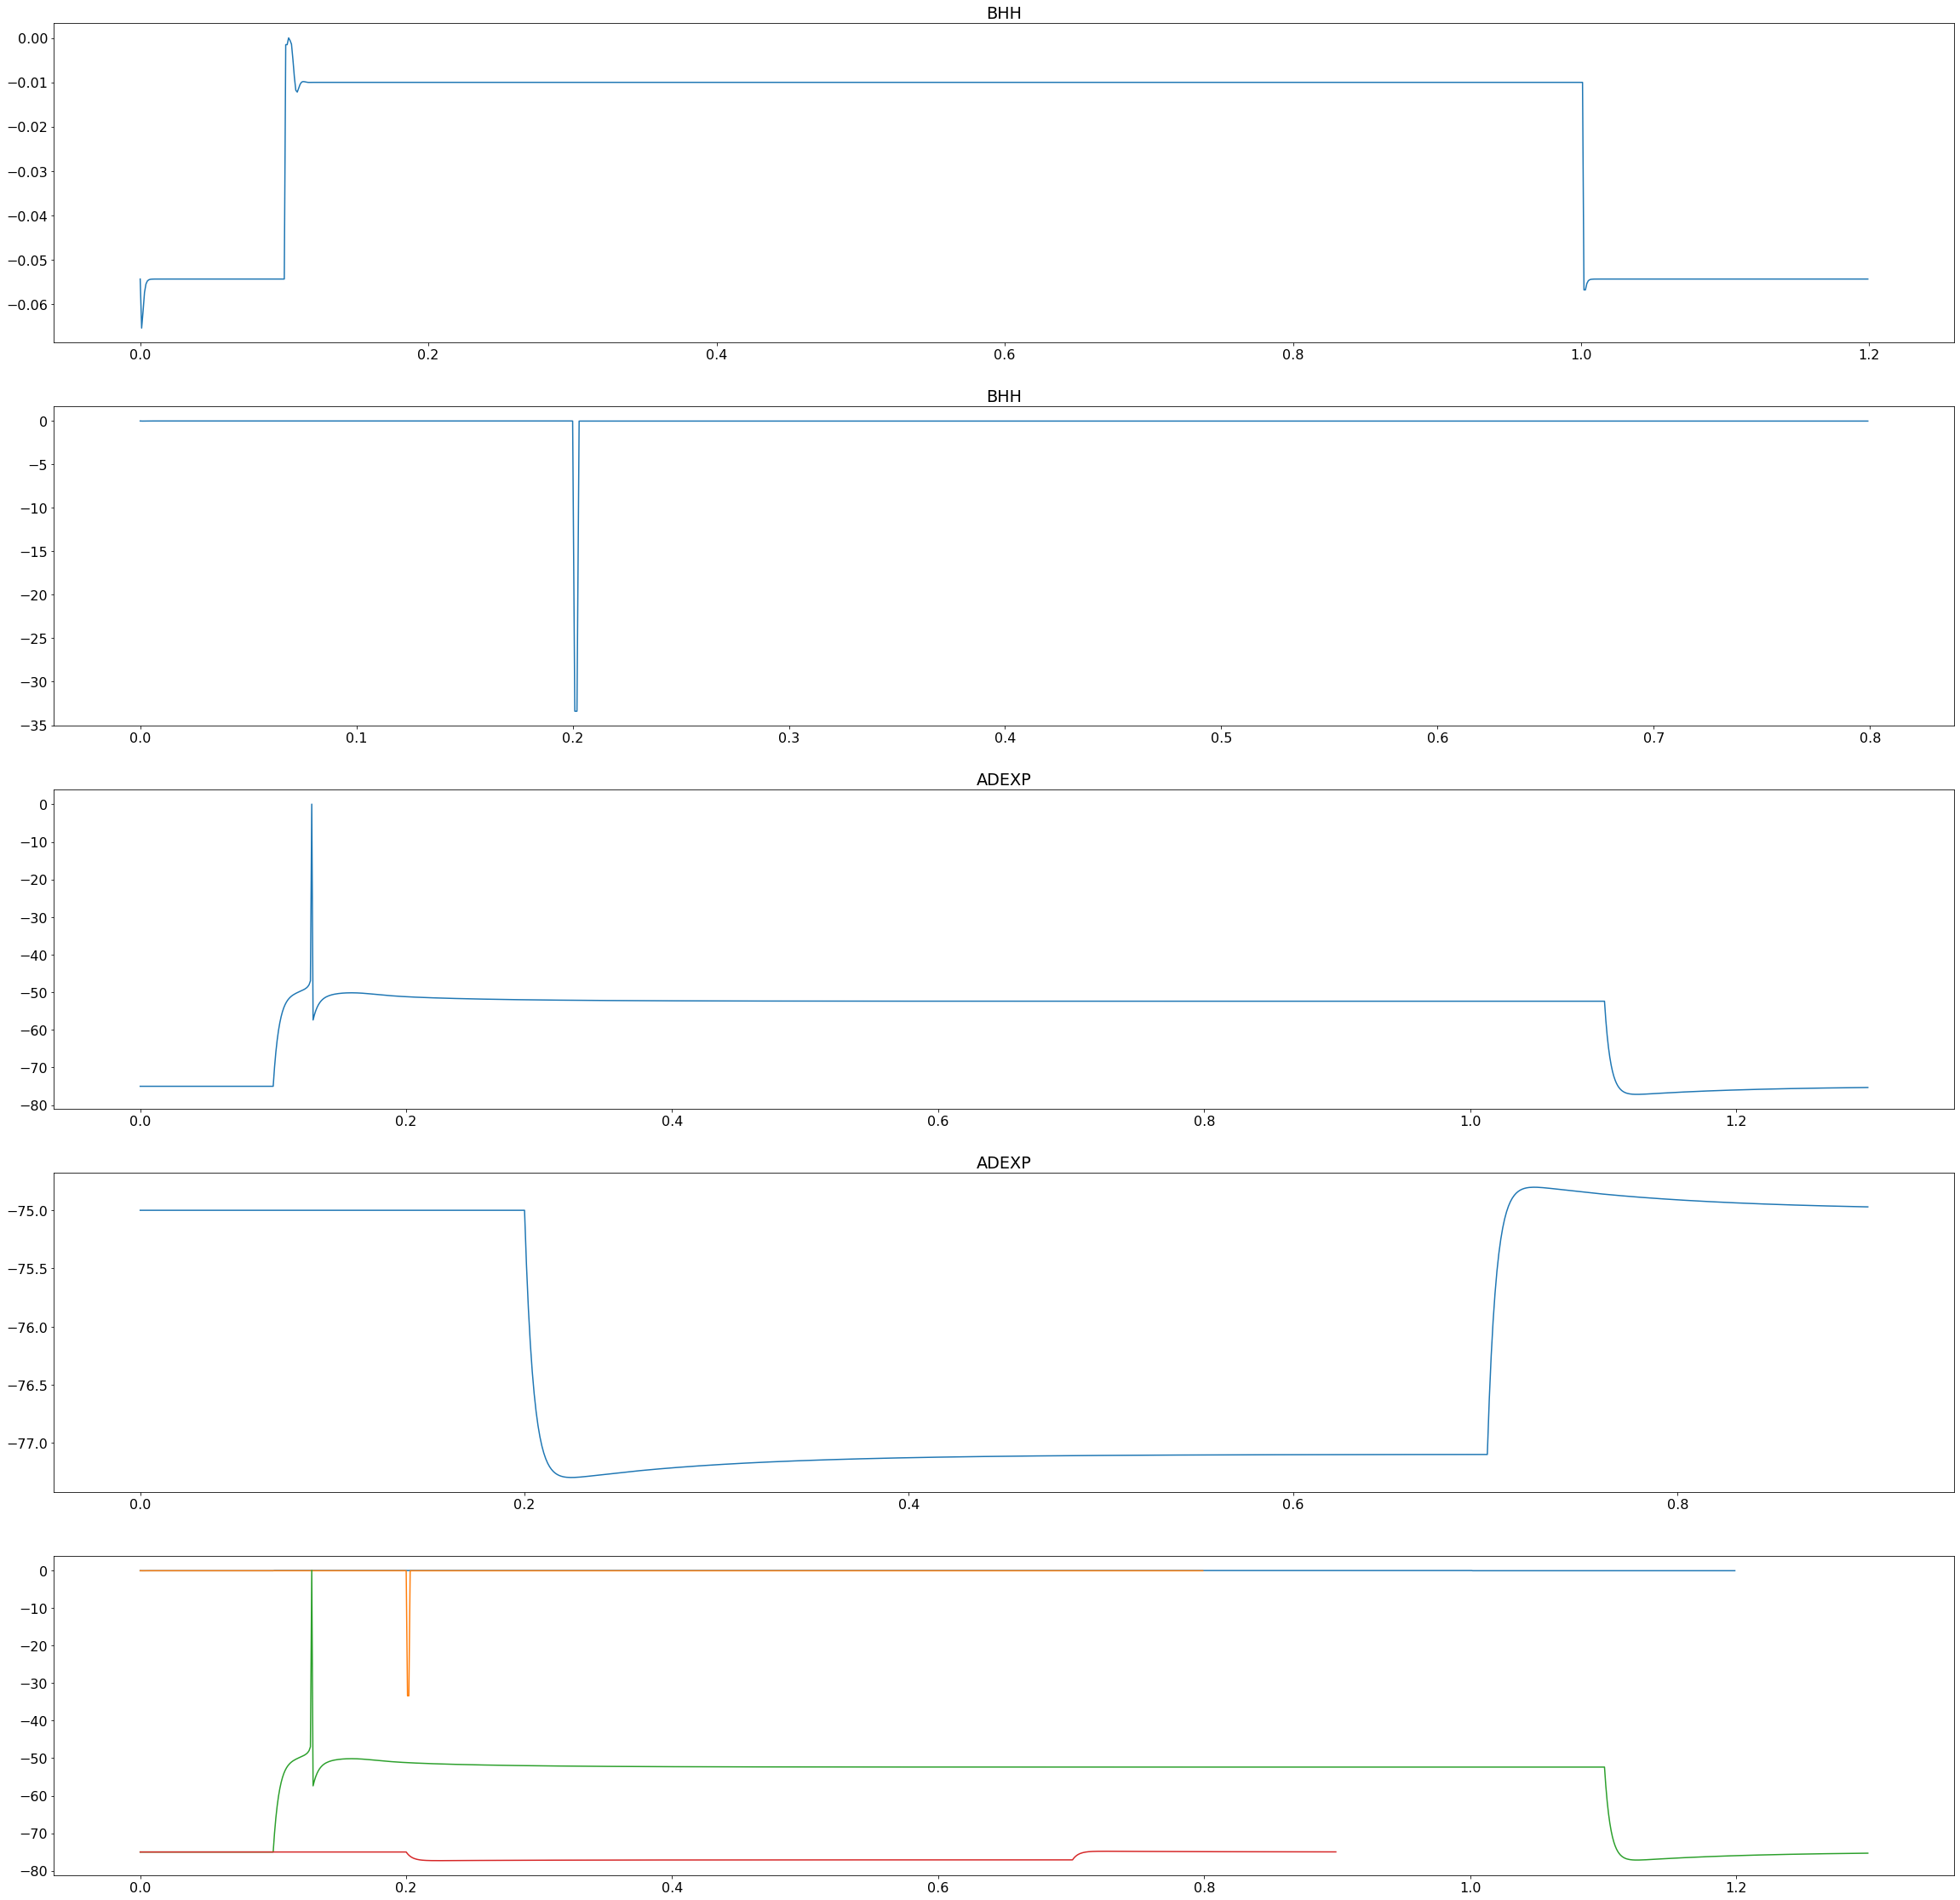

In [7]:
a = testCrucialBackendsSucceed()
a.setUp()
a.test_prefer_pass_1()

{'amplitude': array(0.015860795974731445) * pA, 'duration': array(1000.0) * ms, 'delay': array(100.0) * ms}
{'amplitude': array(-10.0) * pA, 'duration': array(500.0) * ms, 'delay': array(200.0) * m}
[   1.    92.5  184.   275.5  367.   458.5  550. ]
[   1.    92.5  184.   275.5  367.   458.5  550. ]
{'amplitude': array(107.43877551020408) * pA, 'duration': array(1000.0) * ms, 'delay': array(100.0) * ms}
{'amplitude': array(-10.0) * pA, 'duration': array(500.0) * ms, 'delay': array(200.0) * m}


True

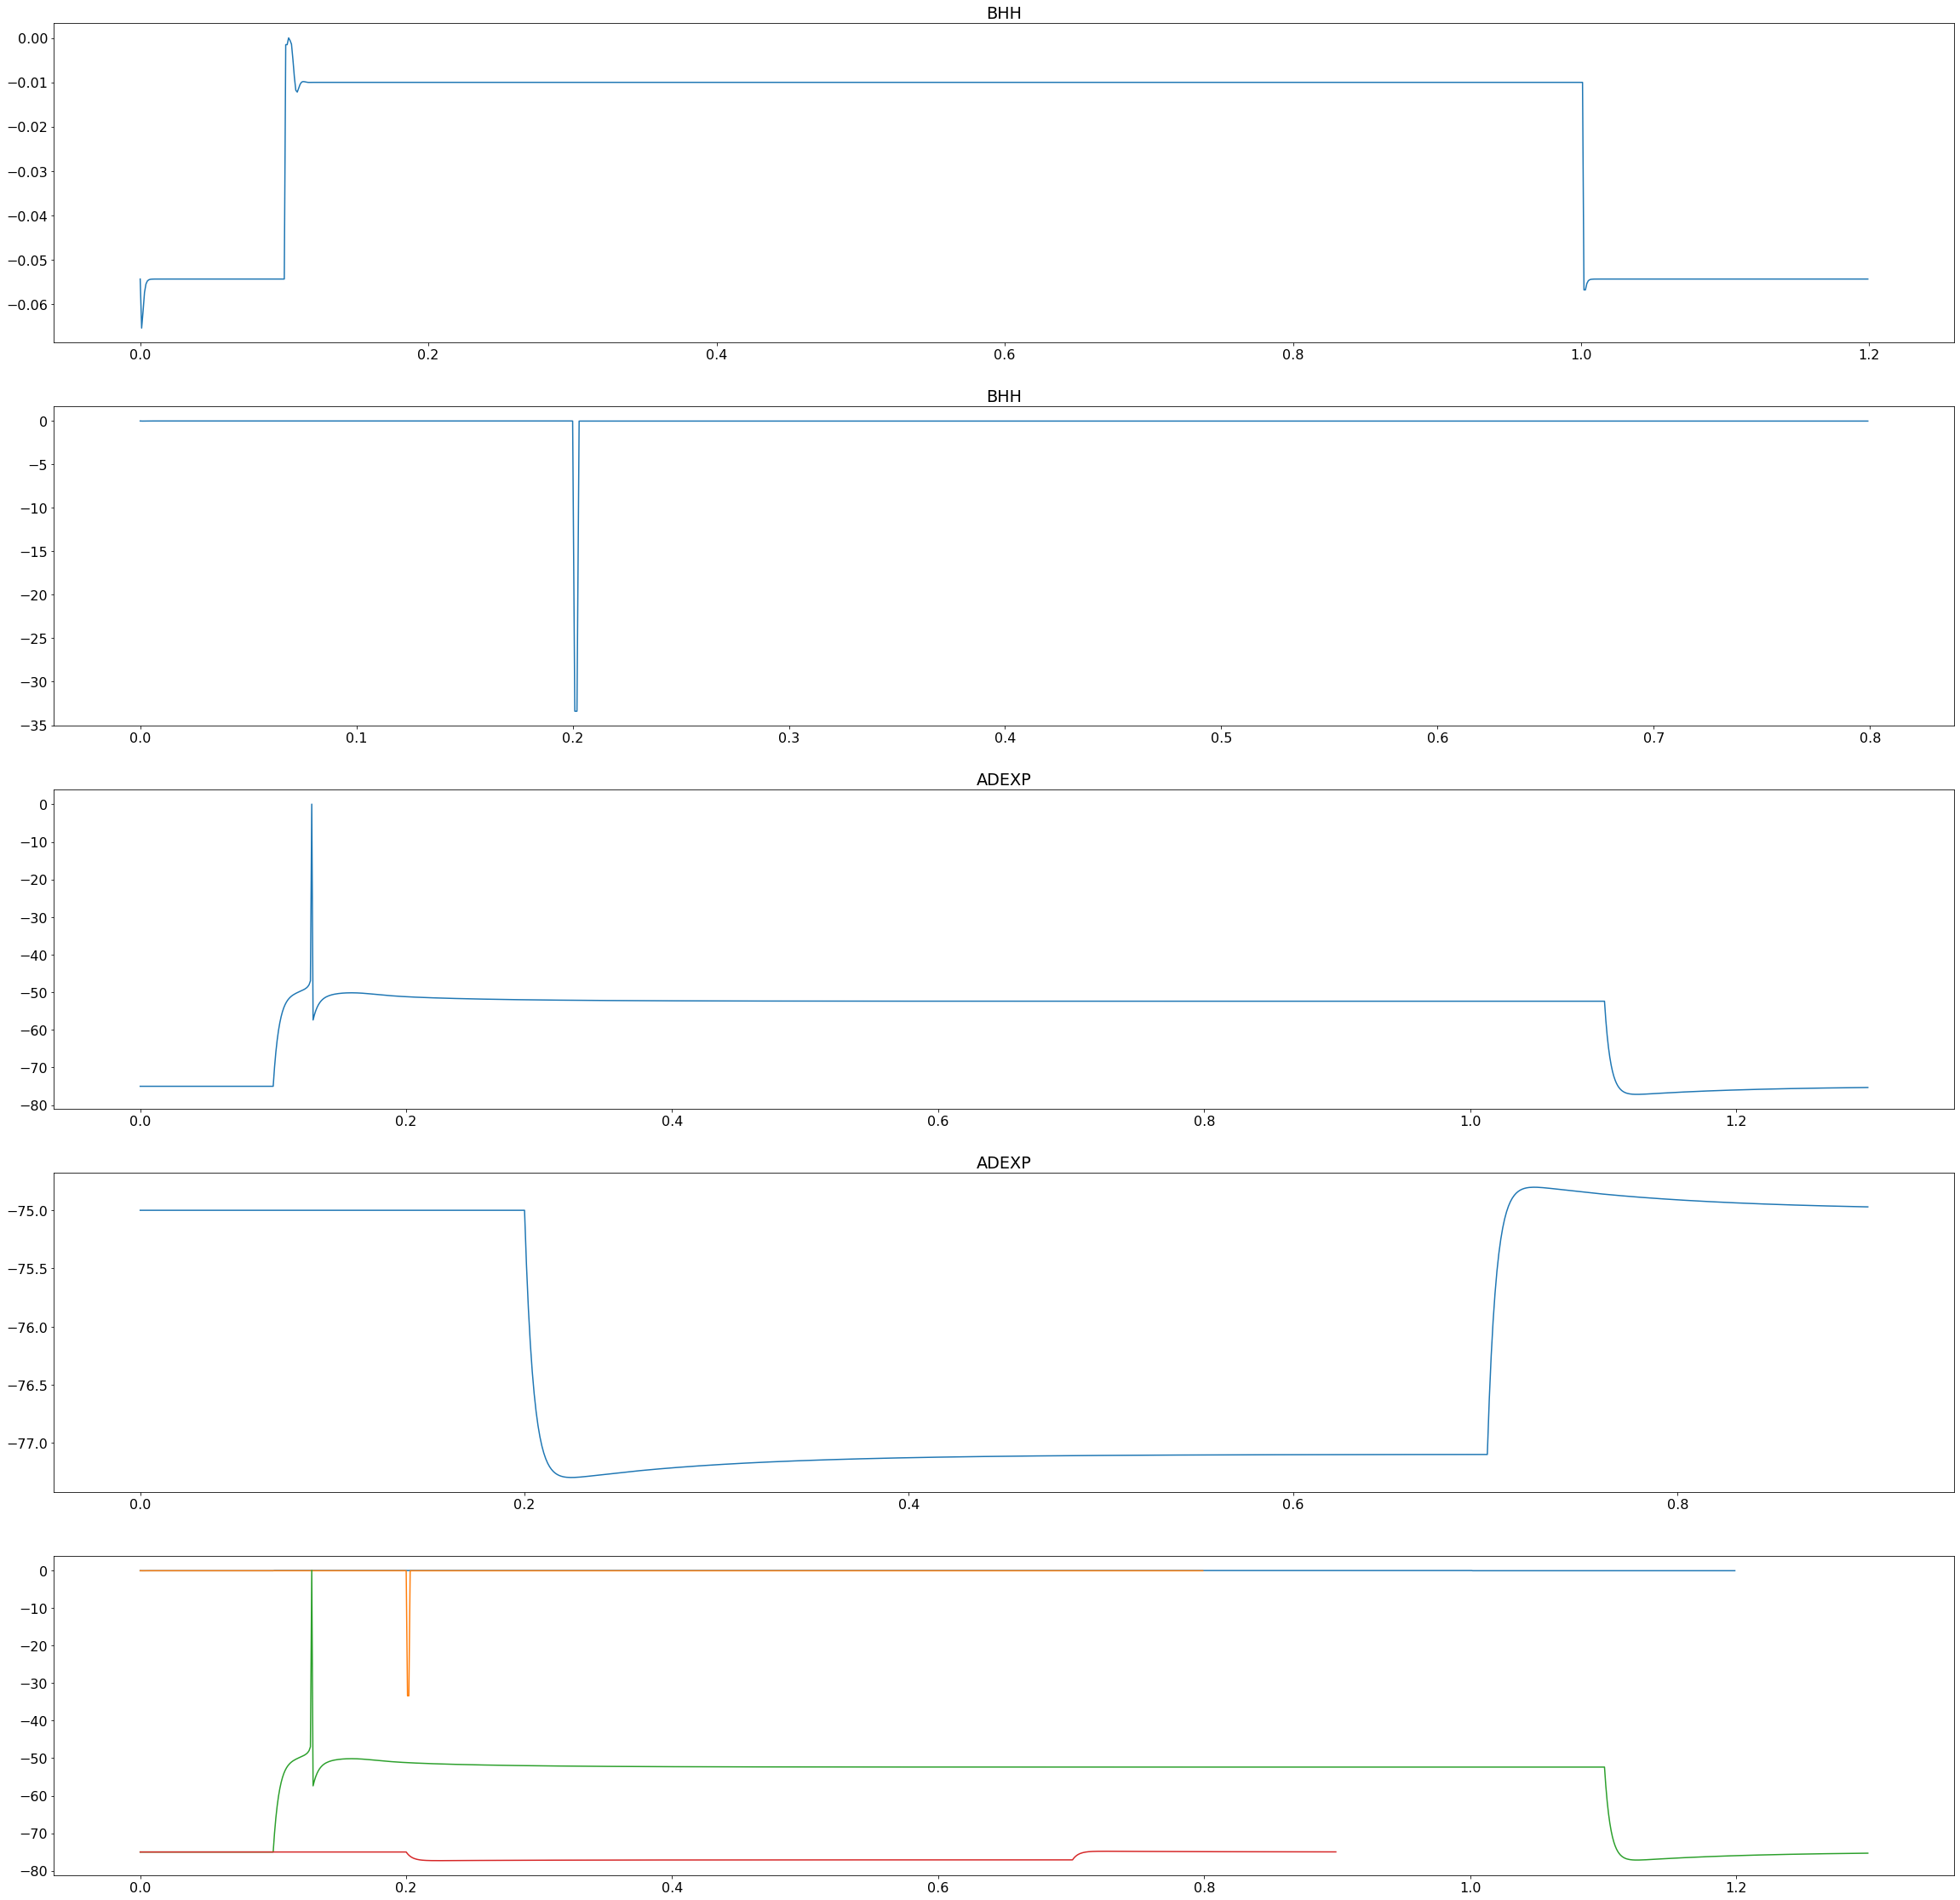

In [8]:
a.test_prefer_pass_2()

{'El_reference': [-0.08569469261169435, -0.05463626766204832], 'C': [3.5071610042390286e-11, 7.630189223327981e-10], 'init_threshold': [0.009908733642683513, 0.04939040414685865], 'threshold_reset_method': {'params': {}, 'name': 'inf'}, 'th_inf': [0.009908733642683513, 0.04939040414685865], 'spike_cut_length': [20, 199], 'init_AScurrents': [0.0, 0.0], 'init_voltage': [-70.0, 0.0], 'threshold_dynamics_method': {'params': {}, 'name': 'inf'}, 'voltage_reset_method': {'params': {}, 'name': 'zero'}, 'extrapolation_method_name': ['endpoints', 'endpoints'], 'dt': [5e-05, 5e-05], 'voltage_dynamics_method': {'params': {}, 'name': 'linear_forward_euler'}, 'El': [0.0, 0.0], 'asc_tau_array': [[0.01, 0.0033333333333333335], [0.3333333333333333, 0.1]], 'R_input': [27743752.593817078, 1792774179.3647704], 'AScurrent_dynamics_method': {'params': {}, 'name': 'none'}, 'AScurrent_reset_method': {'params': {}, 'name': 'none'}, 'dt_multiplier': [10, 10], 'th_adapt': None, 'coeffs': {'a': 1, 'C': 1, 'b': 1,

Exception: Backend GLIF not found in backends.py

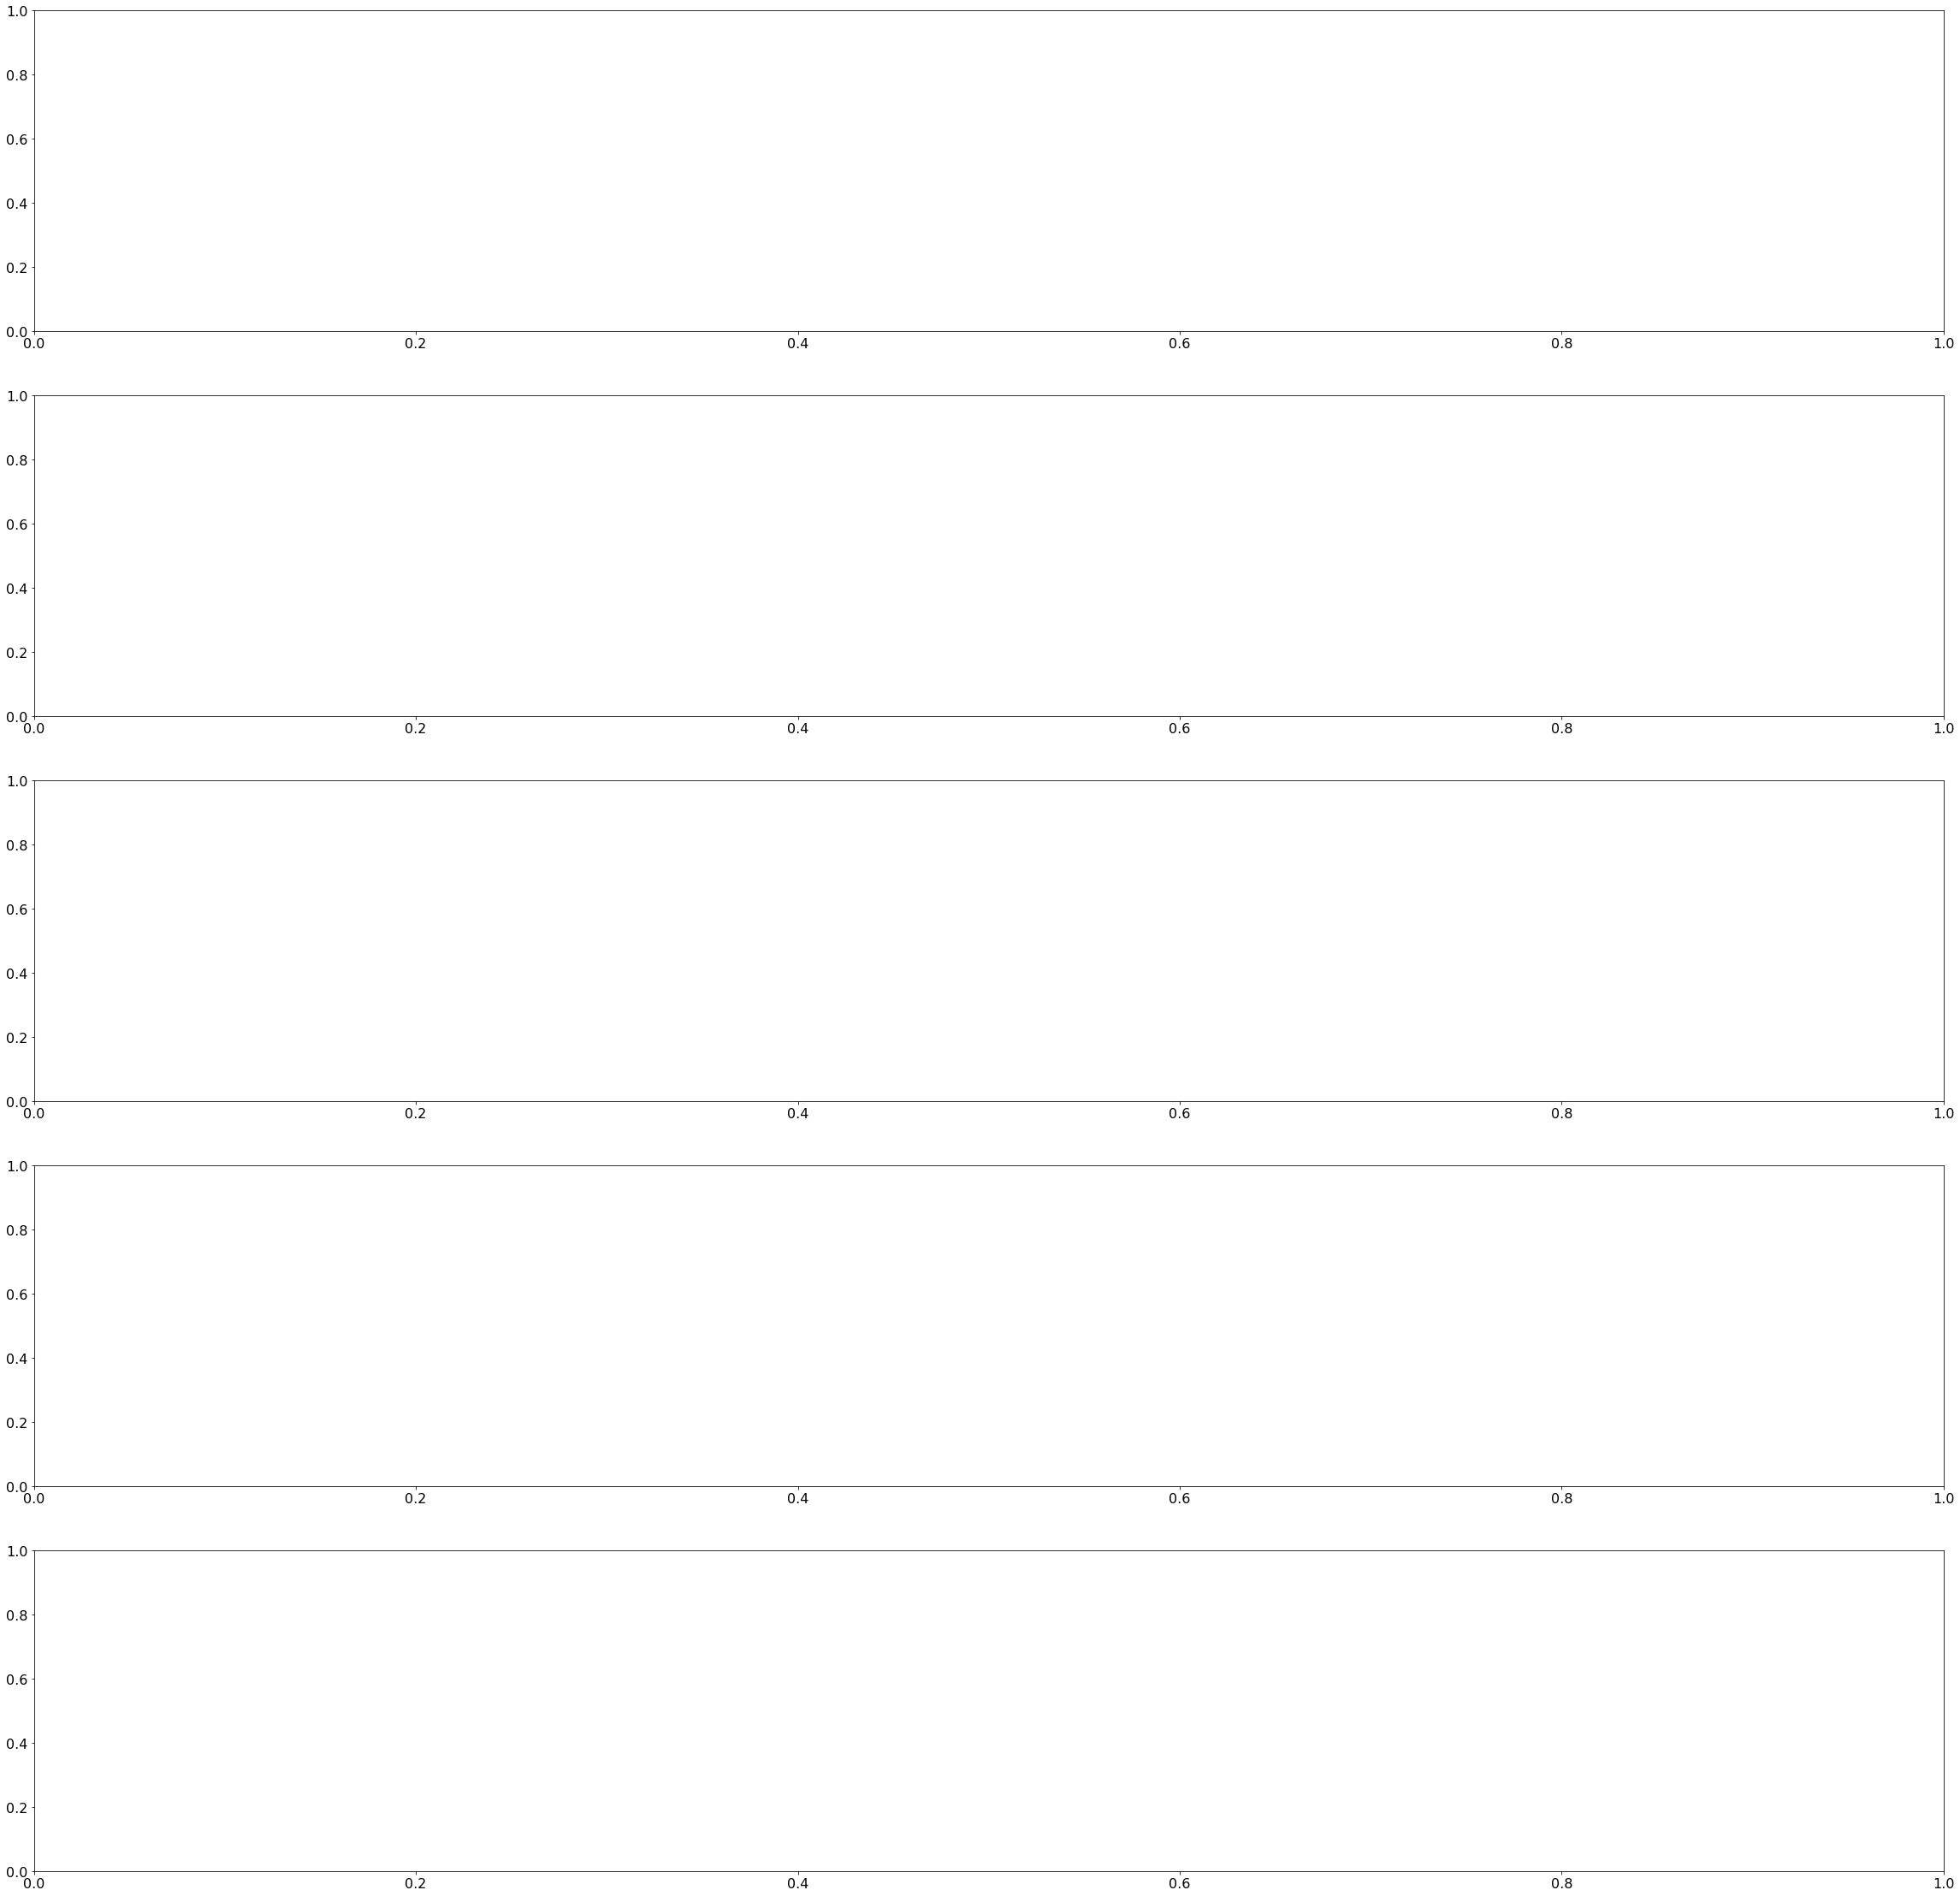

In [9]:
a.test_prefer_pass_2()